# Tech-versity – Clustering

## 0.0 Problem Definition   

This Task is to profile the best companies and job positions to work for from given tech-versity database. For provided segment of learners we need to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

## 0.1 Data Problem   
From the provided data we create clusters which have similar characteristics.Forthis purpose we can use unsupervised ML algorithmns.       


## 0.2 Column Profile    
  -  ‘Unnamed 0’- Index of dataset  
  - Email_hash- Anonymised Personal Identifiable Information (PII)   
  - Company_hash- Current employer of the learner   
  - orgyear- Employment start date   
  - CTC- Current CTC   
  - Job_position- Job profile in the company  
  - CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)    

## 0.3 Data download

# 1.0 Exploratory Data analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/case

/content/drive/MyDrive/case


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.float', '{:.2f}'.format)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('clustering.csv',index_col=0)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB



  

- dataset has 205,843 rows and 6 columns    
- dataset has 3 object types,1 numeric columns, 2 float types    
- nulls present in some columns     

In [ ]:
## convert object type to string
df['company_hash'] = df['company_hash'].astype('string')
df['email_hash'] = df['email_hash'].astype('string')
df['job_position'] = df['job_position'].astype('string')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.00,2014.88,63.57,0.00,2013.00,2016.00,2018.00,20165.00
ctc,205843.00,2271685.04,11800914.44,2.00,530000.00,950000.00,1700000.00,1000150000.00
ctc_updated_year,205843.00,2019.63,1.33,2015.00,2019.00,2020.00,2021.00,2021.00


Follwoing are the observations    
 - Median org_year = 2016   
 - Median ctc = 9,50,000
 - Median ctc_updated year = 2020; ; range = 2015 to 2021

In [ ]:
df.describe(include='string')

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


Following are the observations:
- unique company_hash : 3,72,299
- Most frequent company_hash: nvnv wgzohrnvzwj otqcxwto
- unique company_hash : 1,53,443
- unique job_position : 1017
- Most frequent job_position: Backend Engineer

#1.2 Univariate Analysis

In [ ]:
num_cols = ['orgyear', 'ctc','ctc_updated_year']
cat_cols = ['company_hash', 'email_hash','job_position']

## 1.2.1 Numeric Features

In [ ]:
def plotcol(df,col):
  '''
  function to plot histogram,box plot for column
  '''
  fig, ax = plt.subplots(1,2, figsize=(10, 6))
  sns.histplot(data=df,x=col,kde='True',ax=ax[0])
  sns.boxplot(data=df,y=col,width=0.2,ax=ax[1])
  plt.subplots_adjust(wspace=0.3)
  plt.title(col)
  plt.show()

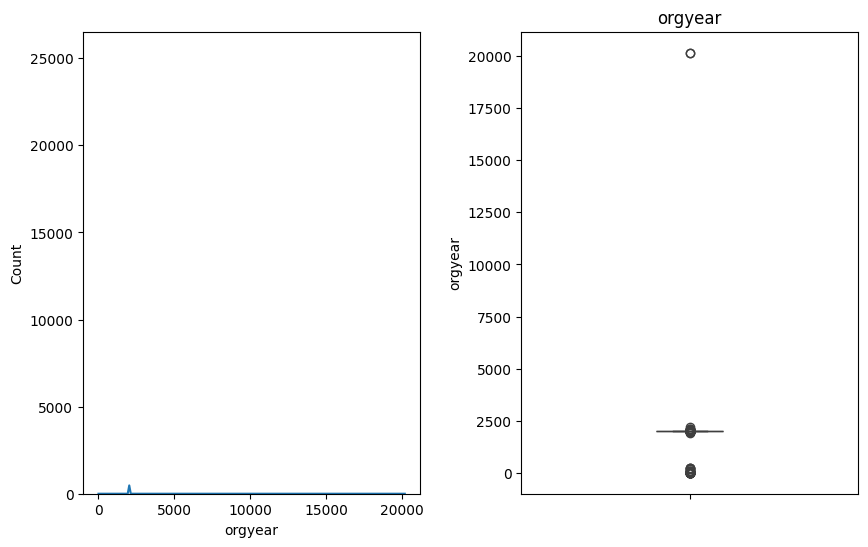

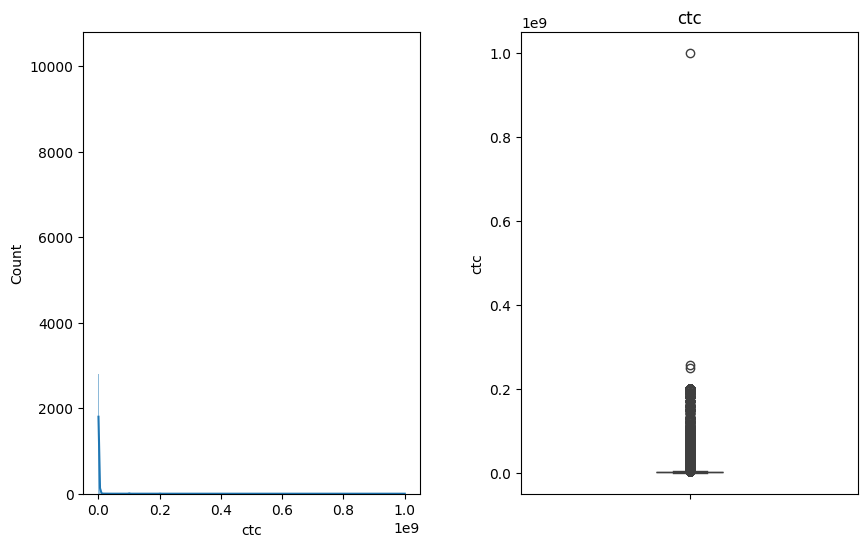

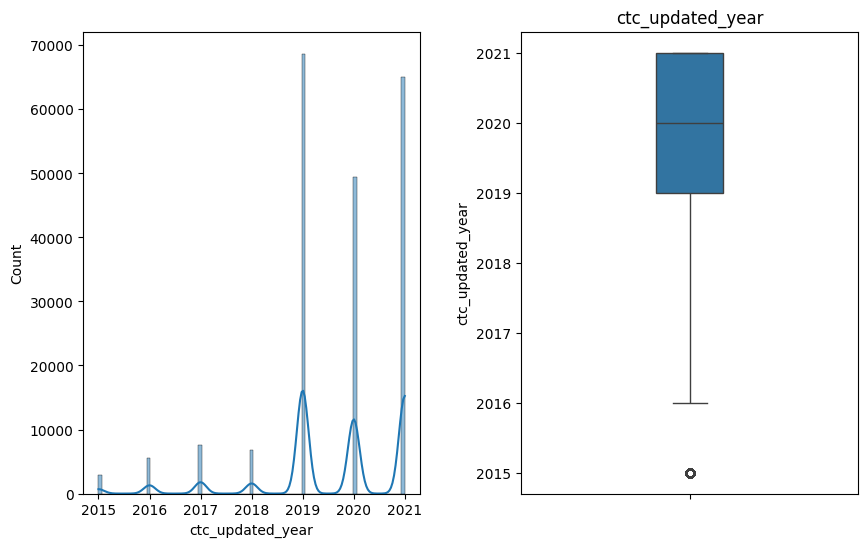

In [ ]:
# @title Default title text
for col in num_cols:
   plotcol(df,col)

## Observations   
- orgyear has outliers  
- ct has outliers
- ctc_updated_year has more updates for years 2019, 2021  

Removal of outliers is essentail to obtain good clusters

## 1.2.2 Categorical Columns

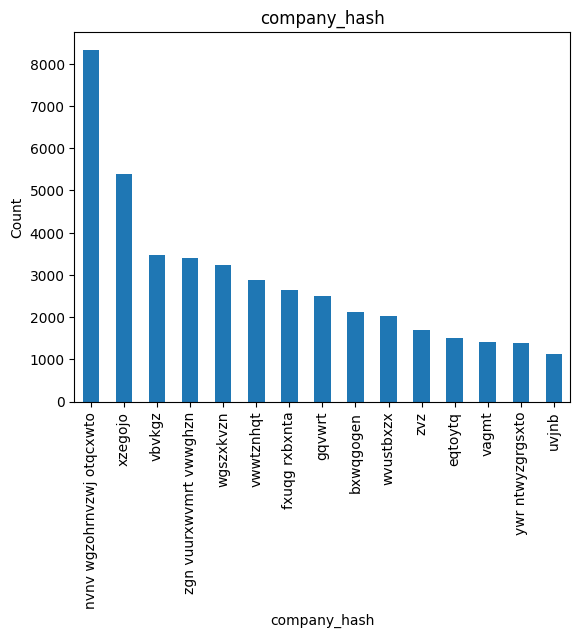

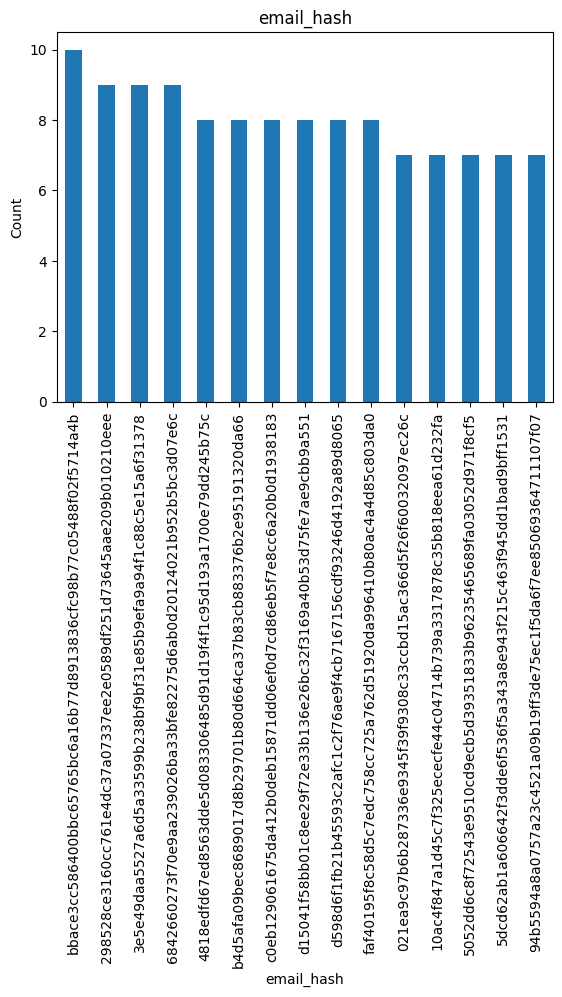

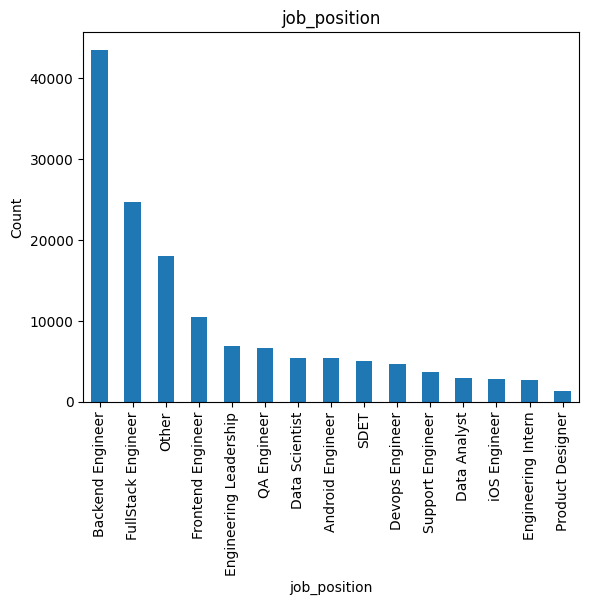

In [ ]:
for col in cat_cols:
    '''
    plot first 15 categories for column
    Since Columns have high cardinality we only plot
    the most significant values
    '''
    df.groupby([col]).size().nlargest(15).plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Observations    

- Highest Company count > 8000   
- Highest Company count = 10   
- Top 3 job_positions are Backend Engineer, FullStack Engineer, Other

## 1.7 Correlation Analysis

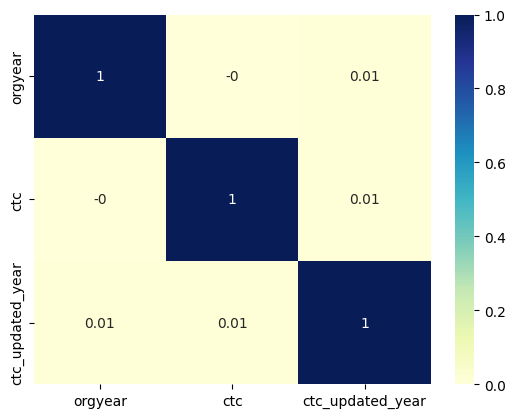

In [ ]:
# plotting correlation heatmap
corr_df =df.corr(numeric_only=True).round(2)
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
plt.show()

 Graph shows no correlation of between columns


## Bi-variate Analysis

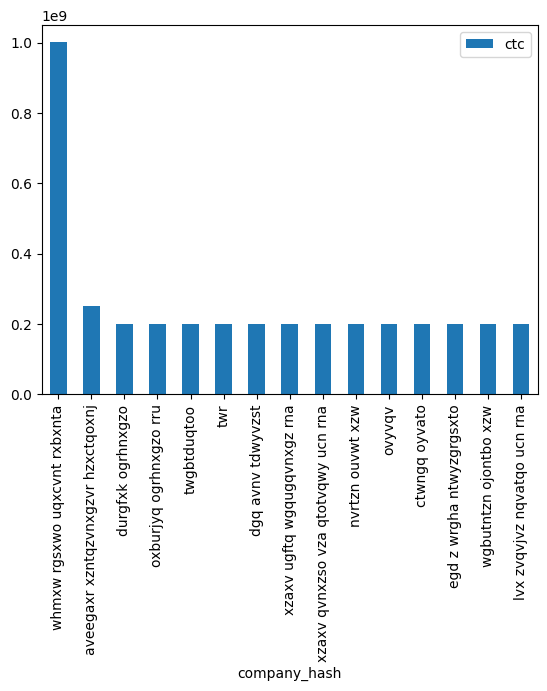

In [ ]:
grp1 =  df.groupby(['company_hash']).agg({ 'ctc' : 'mean'}).reset_index()
grp1.sort_values('ctc',ascending=False,inplace=True)
grp1 = grp1.head(15)

grp1.plot(kind='bar', x='company_hash', y='ctc')
plt.show()

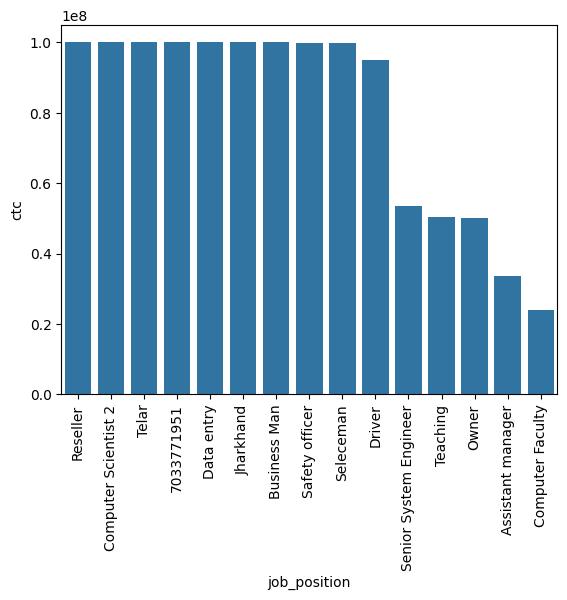

In [ ]:
grp2 =  df.groupby('job_position').agg({ 'ctc' : 'mean'})
grp2.sort_values('ctc',ascending=False,inplace=True)
grp2 = grp2.head(15)

sns.barplot(x='job_position',y='ctc',data=grp2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['email_hash'].value_counts().head(10)

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...    10
298528ce3160cc761e4dc37a07337ee2e0589df251d736...     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124...     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7...     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b5...     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf...     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...     8
faf40195f8c58d5c7edc758cc725a762d51920da996410...     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883...     8
Name: email_hash, dtype: Int64

We see that  some email_hash has multiple records. So we remove the duplicate records

In [ ]:
df = df.groupby('email_hash').first().reset_index()

In [ ]:
df.shape

(153443, 6)

# 2.0 Data Preprocessing

In [ ]:
#check for duplicates
len(df[df.duplicated()])

0

In [ ]:
# percentage of missing values in each column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

job_position       13.18
orgyear             0.05
company_hash        0.02
email_hash          0.00
ctc                 0.00
ctc_updated_year    0.00
dtype: float64

Columns LastWorkingDate, Age, Gender has nulls.

In [ ]:
# replace nulls in job_position with mode
df['job_position'].fillna(df['job_position'].mode()[0],inplace = True)

# replace null company_hash with unknown
df["company_hash"].fillna("Unknown", inplace=True)

# replace null orgyear with mean
df['orgyear'].fillna((df['orgyear'].mean()), inplace=True)

In [ ]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

email_hash         0.00
company_hash       0.00
orgyear            0.00
ctc                0.00
job_position       0.00
ctc_updated_year   0.00
dtype: float64

So All nulls from dataframe is removed

## Outlier Removal

In [ ]:
def std_outlier(df, col):
  '''
  remove outliers using 3 sigma
  '''
  #calculate high,low limit
  hl = df[col].mean() + 3*df[col].std()
  ll = df[col].mean() - 3*df[col].std()
  out = df[(df[col]>ll) & (df[col]<hl)]
  num= len(out)
  diff = len(df) - num
  cnt_per=num*100/len(df)
  print(f'col: {col} | filtered %: {round(100-cnt_per,2)}|outlier count:{diff}')
  return out

In [ ]:
for col in num_cols:
  df = std_outlier(df, col)

col: orgyear | filtered %: 0.03|outlier count:42
col: ctc | filtered %: 0.93|outlier count:1424
col: ctc_updated_year | filtered %: 1.69|outlier count:2570


In [ ]:
df.shape

(149407, 6)

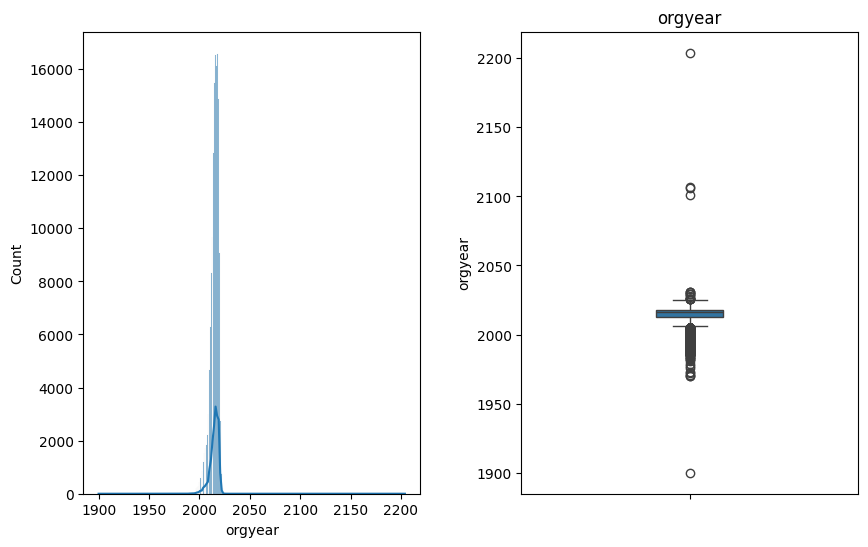

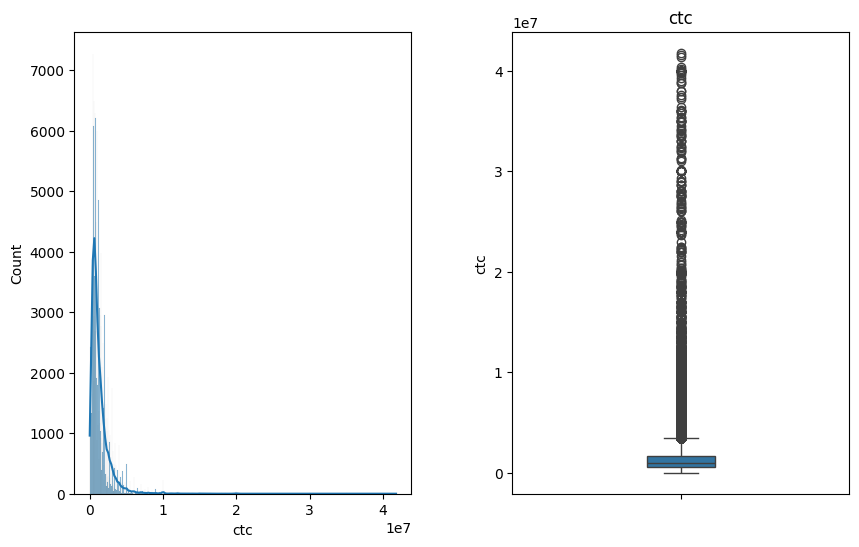

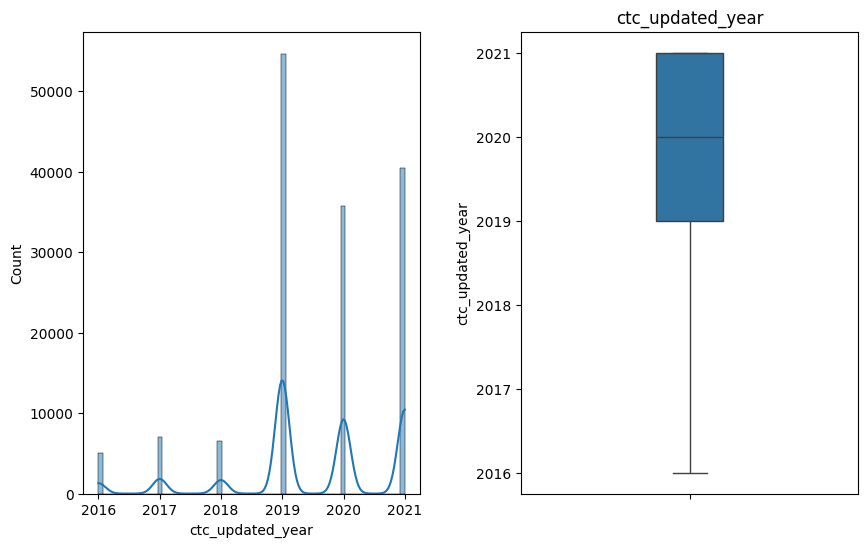

In [ ]:
#plot data after outlier removal
for col in num_cols:
   plotcol(df,col)

## Clean Text columns

In [ ]:
txt_cols= df.select_dtypes(exclude=[np.number]).columns

for col in txt_cols:
  df[col]= df[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+','',str(x)))

## Feature Engineering

In [ ]:
df['exp_yr'] = df['ctc_updated_year'] - df['orgyear']

#  Manual Clusters

In [ ]:
#create 5 point summary for ctc
grp_df = df.groupby(['company_hash','job_position','exp_yr']).agg( ctc_min =('ctc', 'min'),
                                                          ctc_max =('ctc', 'max'),
                                                          ctc_med =('ctc', 'median'),
                                                          ctc_mean =('ctc', 'mean'),
                                                          ctc_cnt =('ctc', 'count')  ).reset_index()


In [ ]:
#merge with original dataset
grp1_df = pd.merge(df, grp_df,  how='left',
                      left_on=['company_hash','job_position', 'exp_yr'],
                   right_on = ['company_hash','job_position', 'exp_yr'])

In [ ]:
def ctc_increase(x):
  """
  function to check ctc > ctc_mean
  """
  if x['ctc'] > x['ctc_mean'] :
     return 1
  else:
     return 3
  if x['ctc']== x['ctc_mean']:
    return 2

In [ ]:
grp1_df['ctc_flag'] =  grp1_df.apply(ctc_increase, axis=1)
grp1_df.sort_values('ctc',ascending=False,inplace=True)


In [ ]:
#Top 10 employees
grp1_df[grp1_df['ctc_flag']==1].head(10)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_yr,ctc_min,ctc_max,ctc_med,ctc_mean,ctc_cnt,ctc_flag
79425,885765a9c6bce2b6a986f9acbf0a61d3e8963eae7c46bf...,wgszxkvzn,2016.00,41800000,Support Engineer,2020.00,4.00,12500,41800000,600000.00,2703452.38,21,1
112598,c10e681ee046b07a7b93708d92e723dd4eba7cdab0177f...,gnytqo,2018.00,40150000,Backend Engineer,2020.00,2.00,95000,40150000,350000.00,3739583.33,12,1
97854,a7d4f2a279c70032c8448d4963cc72cb49145740929135...,vwwtznhqt,2017.00,40000000,Data Analyst,2020.00,3.00,300000,40000000,535000.00,2428523.81,21,1
41870,47ebef56b9c285d9d507886b44920388ea87889ece9948...,zxngq xzegntwy,2015.00,40000000,Other,2020.00,5.00,1100000,40000000,20550000.00,20550000.00,2,1
117479,c97964bbf7f0f192cd4e4650cbc0fb01366a8f6165e75f...,eqttrvzwtq,2015.00,40000000,Other,2020.00,5.00,1200000,40000000,20600000.00,20600000.00,2,1
1893,03536d058ef6743a1e2377620f31b8bb9851377b9ba84b...,zgzt,2017.00,40000000,Frontend Engineer,2020.00,3.00,360000,40000000,20180000.00,20180000.00,2,1
107105,b77430ea7e88a4a48ace140ebe2a85a4dc6c9ccb8467e6...,svbbvonvwp,2020.00,40000000,Backend Engineer,2020.00,0.00,560000,40000000,20280000.00,20280000.00,2,1
37550,405acce4415219a5001f40c37ca2e5f07d433a8e769641...,wgszxkvzn,2017.00,39900000,QA Engineer,2020.00,3.00,40000,39900000,440000.00,1653771.40,35,1
113287,c240203d659ee5ef1a7ed9d8368ec86b7fc1d21e10701b...,wgzwtznqxd,2017.00,39800000,Other,2020.00,3.00,200000,39800000,570000.00,5558571.43,14,1
49860,55c7eef700e87fcd506c731be6dbbdcb79bf709678c2eb...,ftrro evqsg,2002.00,39600000,Engineering Leadership,2019.00,17.00,2700000,39600000,21150000.00,21150000.00,2,1


In [ ]:
# Bottom 10 employees
grp1_df[grp1_df['ctc_flag']==3].tail(10)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_yr,ctc_min,ctc_max,ctc_med,ctc_mean,ctc_cnt,ctc_flag
90372,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,zvz,2023.00,600,Backend Engineer,2019.00,-4.00,600,600,600.00,600.00,1,3
108336,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,gjg,2018.00,600,FullStack Engineer,2021.00,3.00,600,1400000,1250000.00,883533.33,3,3
114364,c411a6917058b50f44d7c62751be9b232155b23211de4c...,vcvzn sqghu,2013.00,300,Database Administrator,2019.00,6.00,300,300,300.00,300.00,1,3
47157,512f761579fb116e215cabc9821c7f81153f0763e16018...,ftm ongqt,2016.00,25,Android Engineer,2018.00,2.00,25,25,25.00,25.00,1,3
78960,8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...,uqvpqxnx voogwxvnto,2020.00,24,Other,2020.00,0.00,24,24,24.00,24.00,1,3
68231,75357254a31f133e2d3870057922feddeba82b88056a07...,xm,2019.00,16,Backend Engineer,2018.00,-1.00,16,16,16.00,16.00,1,3
107771,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,xm,2016.00,15,Backend Engineer,2018.00,2.00,15,15,15.00,15.00,1,3
20930,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,xzntqcxtfmxn,2013.00,14,Backend Engineer,2018.00,5.00,2,1000000,14.00,228004.40,5,3
141660,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,xzntqcxtfmxn,2013.00,6,Backend Engineer,2018.00,5.00,2,1000000,14.00,228004.40,5,3
31013,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,xzntqcxtfmxn,2014.00,2,Backend Engineer,2019.00,5.00,2,1000000,14.00,228004.40,5,3


In [ ]:
#  Top 10 employees - having 5/6/7 years earning more than their peers
grp1_df[(grp1_df['ctc_flag']==1)&
        ( grp1_df['exp_yr'].isin([5,6,7]))].head(10)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_yr,ctc_min,ctc_max,ctc_med,ctc_mean,ctc_cnt,ctc_flag
41870,47ebef56b9c285d9d507886b44920388ea87889ece9948...,zxngq xzegntwy,2015.00,40000000,Other,2020.00,5.00,1100000,40000000,20550000.00,20550000.00,2,1
117479,c97964bbf7f0f192cd4e4650cbc0fb01366a8f6165e75f...,eqttrvzwtq,2015.00,40000000,Other,2020.00,5.00,1200000,40000000,20600000.00,20600000.00,2,1
118381,cb05ea975a0cc2de7eeaa023dcd6d77ecbd2843ed8c925...,tj,2013.00,39000000,Backend Engineer,2020.00,7.00,1200000,39000000,1500000.00,9112000.00,5,1
17106,1d0232fbd003ea0e36388b6bea5782e1812734a79d5a7d...,stzuvwn,2013.00,38800000,Other,2020.00,7.00,500000,38800000,980000.00,8496000.00,5,1
25994,2c5f9aefb73259d3a6df5fe503c48587d8fc61eefacc8e...,zgn vuurxwvmrt,2014.00,36000000,Backend Engineer,2021.00,7.00,10000,36000000,400000.00,3214666.67,15,1
44783,4d287c2dd88a8b8008781f9081581d3cd7a36d0cc88c8d...,ofxssj,2014.00,36000000,Other,2020.00,6.00,400000,36000000,11200000.00,15866666.67,3,1
84742,914f81589b8d14a404eeee60384fc8e9260f1023ca6636...,nvnv wgzohrnvzwj otqcxwto,2015.00,35400000,Other,2020.00,5.00,100000,35400000,600000.00,1340489.34,47,1
85674,92e74560ace875ff0046b22e57fd7138557ab6d2f29881...,nvnv wgzohrnvzwj otqcxwto,2015.00,29300000,Data Analyst,2020.00,5.00,200000,29300000,620500.00,3106749.92,12,1
66991,730cc9e861791b0e652875a3487ced91434340a0224ada...,wrgctq xzegntwy,2013.00,24000000,Backend Engineer,2020.00,7.00,800000,24000000,24000000.00,16266666.67,3,1
51611,58ad6652cff3d7eeed67d30b084bd0df31a23cfe56a351...,wrgctq xzegntwy,2013.00,24000000,Backend Engineer,2020.00,7.00,800000,24000000,24000000.00,16266666.67,3,1


In [ ]:
 grp2 = df.groupby(['company_hash','job_position']).agg(  ctc_mean =('ctc', 'mean')  ).reset_index()

In [ ]:
#merge with original dataset
grp2_df = pd.merge(df, grp2,  how='left',
                      left_on=['company_hash','job_position' ],
                   right_on = ['company_hash','job_position' ])

In [ ]:
grp2_df['ctc_flag'] =  grp2_df.apply(ctc_increase, axis=1)
grp2_df.sort_values('ctc',ascending=False,inplace=True)
grp2_df[grp2_df['ctc_flag']==1] [:10]

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_yr,ctc_mean,ctc_flag
79425,885765a9c6bce2b6a986f9acbf0a61d3e8963eae7c46bf...,wgszxkvzn,2016.00,41800000,Support Engineer,2020.00,4.00,951848.83,1
32268,372a08ed8c43f13f933885e5bf46bd40ef031f4857b38b...,xzzgtjt ntwyzgrgsxto,2018.00,41600000,Frontend Engineer,2020.00,2.00,11057500.00,1
71894,7b8bc23f69023ff6bb10902223d02f7887abe827a43ca6...,nwo xgz,2018.00,41400000,Support Engineer,2021.00,3.00,14400000.00,1
112598,c10e681ee046b07a7b93708d92e723dd4eba7cdab0177f...,gnytqo,2018.00,40150000,Backend Engineer,2020.00,2.00,1331293.10,1
97854,a7d4f2a279c70032c8448d4963cc72cb49145740929135...,vwwtznhqt,2017.00,40000000,Data Analyst,2020.00,3.00,1258337.49,1
41870,47ebef56b9c285d9d507886b44920388ea87889ece9948...,zxngq xzegntwy,2015.00,40000000,Other,2020.00,5.00,20550000.00,1
97789,a7b47e958b5a48f375cb74e23537b601396356545a19c5...,otre tburgjta,2021.00,40000000,Backend Engineer,2019.00,-2.00,1765913.76,1
115625,c6409229b18c5c814e6e41c795626c72592b383286194c...,wsx,2018.00,40000000,Support Engineer,2021.00,3.00,10922500.00,1
117479,c97964bbf7f0f192cd4e4650cbc0fb01366a8f6165e75f...,eqttrvzwtq,2015.00,40000000,Other,2020.00,5.00,2320782.61,1
1893,03536d058ef6743a1e2377620f31b8bb9851377b9ba84b...,zgzt,2017.00,40000000,Frontend Engineer,2020.00,3.00,2722068.97,1


In [ ]:
#Top 2 positions in every company (based on their CTC)
grp2_df.groupby(['company_hash','job_position']).head(2)  [:20]

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_yr,ctc_mean,ctc_flag
79425,885765a9c6bce2b6a986f9acbf0a61d3e8963eae7c46bf...,wgszxkvzn,2016.00,41800000,Support Engineer,2020.00,4.00,951848.83,1
32268,372a08ed8c43f13f933885e5bf46bd40ef031f4857b38b...,xzzgtjt ntwyzgrgsxto,2018.00,41600000,Frontend Engineer,2020.00,2.00,11057500.00,1
71894,7b8bc23f69023ff6bb10902223d02f7887abe827a43ca6...,nwo xgz,2018.00,41400000,Support Engineer,2021.00,3.00,14400000.00,1
46478,5007ab5e8c1e67195a98520a24d8e9279b39a46f8a28b0...,orp ogenfvqt,2015.00,40420000,Data Analyst,2020.00,5.00,40420000.00,3
112598,c10e681ee046b07a7b93708d92e723dd4eba7cdab0177f...,gnytqo,2018.00,40150000,Backend Engineer,2020.00,2.00,1331293.10,1
97854,a7d4f2a279c70032c8448d4963cc72cb49145740929135...,vwwtznhqt,2017.00,40000000,Data Analyst,2020.00,3.00,1258337.49,1
38162,4174e877b5c4f6c6abc218653f98db62443e616cca3420...,avtfgg uvwp,2019.00,40000000,Engineering Leadership,2020.00,1.00,40000000.00,3
113365,c264dc1251b0e0a8d9d59762c0d683685df2765ec443d2...,bgpoyvq wqtvnxct onhaxgo,2015.00,40000000,Other,2019.00,4.00,40000000.00,3
41870,47ebef56b9c285d9d507886b44920388ea87889ece9948...,zxngq xzegntwy,2015.00,40000000,Other,2020.00,5.00,20550000.00,1
97949,a802ccd510cb03895a5c7d5ec591c473cb1aad53cc1b22...,pgnnvzk,2017.00,40000000,Other,2021.00,4.00,40000000.00,3


In [ ]:
 grp3 = df.groupby(['company_hash']).agg(  ctc_mean =('ctc', 'mean')  ).reset_index()

#merge with original dataset
grp3_df = pd.merge(df, grp3,  how='left',
                      left_on=['company_hash' ],
                   right_on = ['company_hash' ])


grp3_df['ctc_flag'] =  grp3_df.apply(ctc_increase, axis=1)
grp3_df.sort_values('ctc',ascending=False,inplace=True)


In [ ]:
#Top 10 companies (based on their CTC)
grp3_df[grp3_df['ctc_flag']==1].head(10)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_yr,ctc_mean,ctc_flag
79425,885765a9c6bce2b6a986f9acbf0a61d3e8963eae7c46bf...,wgszxkvzn,2016.00,41800000,Support Engineer,2020.00,4.00,845086.62,1
32268,372a08ed8c43f13f933885e5bf46bd40ef031f4857b38b...,xzzgtjt ntwyzgrgsxto,2018.00,41600000,Frontend Engineer,2020.00,2.00,2530416.62,1
71894,7b8bc23f69023ff6bb10902223d02f7887abe827a43ca6...,nwo xgz,2018.00,41400000,Support Engineer,2021.00,3.00,1556274.49,1
46478,5007ab5e8c1e67195a98520a24d8e9279b39a46f8a28b0...,orp ogenfvqt,2015.00,40420000,Data Analyst,2020.00,5.00,2963444.44,1
112598,c10e681ee046b07a7b93708d92e723dd4eba7cdab0177f...,gnytqo,2018.00,40150000,Backend Engineer,2020.00,2.00,967723.68,1
97854,a7d4f2a279c70032c8448d4963cc72cb49145740929135...,vwwtznhqt,2017.00,40000000,Data Analyst,2020.00,3.00,859650.65,1
41870,47ebef56b9c285d9d507886b44920388ea87889ece9948...,zxngq xzegntwy,2015.00,40000000,Other,2020.00,5.00,4344166.67,1
97789,a7b47e958b5a48f375cb74e23537b601396356545a19c5...,otre tburgjta,2021.00,40000000,Backend Engineer,2019.00,-2.00,1127236.53,1
115625,c6409229b18c5c814e6e41c795626c72592b383286194c...,wsx,2018.00,40000000,Support Engineer,2021.00,3.00,1441050.58,1
117479,c97964bbf7f0f192cd4e4650cbc0fb01366a8f6165e75f...,eqttrvzwtq,2015.00,40000000,Other,2020.00,5.00,1108695.71,1


#   Data preparation


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

pd.options.mode.chained_assignment = None

In [ ]:
# select columns for cluster model
X = df[['orgyear', 'ctc', 'ctc_updated_year', 'exp_yr','company_hash','job_position']]

# Create a LabelEncoder object
le = LabelEncoder()

# encode categorical vars
X['company_hash'] = le.fit_transform(X['company_hash'])
X['job_position'] = le.fit_transform(X['job_position'])

In [ ]:
#standardise data
std = StandardScaler()
X_std = std.fit_transform(X)

# 3.0 Model building   
## 3.1 K- means clustering

In [ ]:
kmeans_kwargs = {
            "init": "random",
            "n_init": 10,
            "max_iter": 300,
            "random_state": 42  }


In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

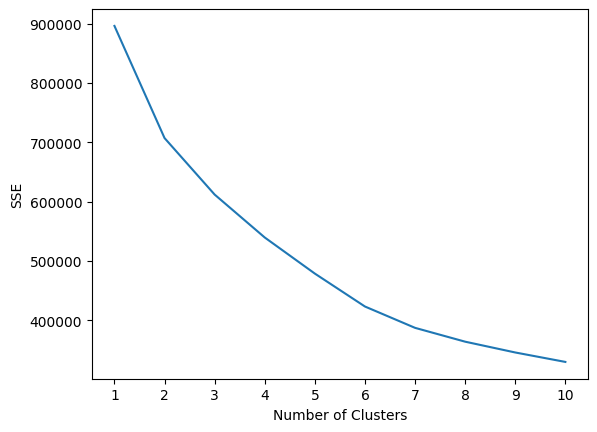

In [ ]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

FRom the graph we can choose optimal number of clusters as 5.

## Hierarchical Clustering

In [ ]:
X_sample =  X.sample(frac =.1)

In [ ]:
#standardise data
std = StandardScaler()
X1_std = std.fit_transform(X_sample)

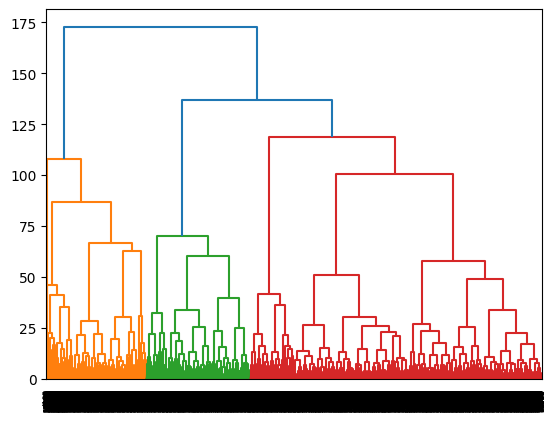

In [ ]:
linkage_data = linkage(X1_std, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

##  Insights & Recommendations
 Top 3 job positions are
  - BackEnd Engineer
  - FullstackEngineer
  - Other

Top 3 Companies are
 - nvnv wgzohrnvzwj otqcxwto
 - xzegojo
 - vbvkgz


There is scope for more placements outside of these top companies and job positions

The models show number of clusters as 5. So specific action customised to these groups can be considered to further improve the placements